The first thing to be done is to gather the data from out datasets. We will also annotate them with an extra field
"depression_related" in order to know if a certain post is depression prone according to its subreddit.

In [1]:
import pandas as pd

# Load dataset files
print("Loading training datasets...")

# Depression (train)
data_depression = pd.DataFrame(pd.read_json("../backups/r_depression_base.jsonl", lines=True))
data_depression["depression_related"] = [1] * len(data_depression.index)  # Dep. identifier: true
dep_size = len(data_depression.index)

# Non-depression (train)
data_control = pd.DataFrame(pd.read_json("../backups/reference_collection.jsonl", lines=True))
data_control["depression_related"] = [0] * len(data_control.index)  # Dep. identifier: false
non_dep_size = len(data_control.index)

# Join both data-frames
data = data_depression.append(data_control, ignore_index=True)
print("Datasets succesfully loaded and merged")

Loading training datasets...
Datasets succesfully loaded and merged


<AxesSubplot:>

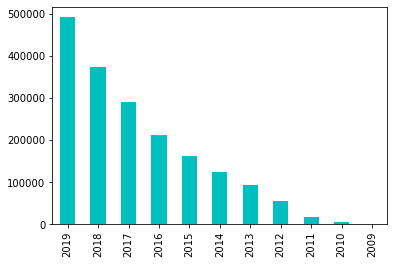

In [9]:
pd.value_counts(data["created_utc"].astype("datetime64[s]").dt.year).plot(kind="bar", color="c")

After that we have to work with our dataframe to have the correct data to work with. We will need:
* The text in the title and in the selftext of each post
* The proportion of pronouns in each post

In order to accomplish the first point, we will work with both title and selftext of each post independently and then
with both of them merged. So we will merge them making sure that both of them are present:

In [2]:
try:
    train["selftext"], train["title"]
except KeyError:
    pass
else:
    train["title_selftext"] = train["title"] + train["selftext"]

In [ ]:
import mlearning_utils as mlu
train["title_selftext"].fillna(" ")
train["title_selftext"].apply(lambda x: mlu.pre_process(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2), stop_words="english", lowercase=True)
cv.fit_transform(train["title_selftext"])

In [ ]:
from nltk.tokenize import word_tokenize
# Pronouns proportion
pronouns = mlu.get_pronoun_proportion(train["title_selftext"].tolist())